# **Case Avançado**

Judy Hopps, uma coelha da zona rural, vai atrás de seu sonho tornar-se oficial no departamento de polícia da cidade de Zootopia. Juntamente de seu então parceiro Nick, eles vão até o DMV conseguir mais informações para resolverem um caso - e falam com Flecha, um funcionário de lá. Porém, após eles saírem, um amigo de Flecha o questiona se conhece alguém que possa ajudá-lo a analisar informações demográficas de países, com o intuito de implantar novas políticas públicas para Zootopia no futuro. Portanto, o ajudaremos.

In [51]:
# Instalando as bibliotecas que vamos usar
%pip install pandas seaborn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
# Importando as bibliotecas que serão utilizadas. Contudo, caso se sinta necessidade, importe outras bibliotecas que desejar.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

O amigo de Flecha possui um arquivo .csv que há informações que podem ser úteis para nós. Aqui, vai uma breve informação de cada coluna do DataFrame:

**Descrição das Colunas do DataFrame:**
- **Country**: Nome do país ao qual os dados pertencem.
- **Quality of Life Index**: A qualidade de vida em um país como um todo, abarcando fatores como poder de compra, segurança, poluição e custo de vida.
- **Purchasing Power Index**: Poder de compra médio da população.
- **Safety Index**: Nível de segurança pública em um país,
- **Cost of Living Index**: Custo médio de vida em um país, levando em conta preços de bens e serviços essenciais.
- **Pollution Index**: Nível de poluição ambiental.
- **Climate Index**:  Índice que avalia a qualidade do clima em um país com base em fatores como temperatura, umidade e conforto térmico.
- **Health Care Index**: Nível de qualidade do acesso a saúde.

## **Questão 1**

### **a)** Leia o arquivo "quality_of_life_indices_by_country_2.csv", e o transforme em um data frame do Pandas.

In [53]:
df = pd.read_csv('Dados/quality_of_life_indices_by_country_2.csv') #Lê o csv e atribui a varíavel "df" o dataframe criado
df.head() #Exibe as 5 primeiras linhas do dataframe

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Pollution Index,Climate Index
0,Austria,192.9,110.0,70.5,77.9,60.7,20.9,77.8
1,Qatar,193.3,185.7,84.2,73.4,47.5,60.0,36.0
2,Estonia,185.7,86.0,76.3,75.5,49.4,17.0,64.3
3,Denmark,209.9,137.3,74.0,78.4,66.9,20.6,82.5
4,Panama,124.4,47.9,57.3,60.7,43.9,55.6,67.8


### **b)** Podem haver linhas com valores Na. Primeiramente, cheque se há tais linhas, caso elas existam, as remova.

In [54]:
df.isna().any() #Função isna() irá atribuir para cada valor um Boolean dizendo se é na. A função any() retorna se exciste pelo menos 1 ocorrência verdadeira

Country                   True
Quality of Life Index     True
Purchasing Power Index    True
Safety Index              True
Health Care Index         True
Cost of Living Index      True
Pollution Index           True
Climate Index             True
dtype: bool

In [55]:
df = df.dropna() #Para remover, necessário usar a função dropna, no entanto ela não modifica o df raiz, então é necessário reatribuir o df principal com o novo df modificado

In [56]:
df.isna().any() #Verificando se funcionou a remoção.

Country                   False
Quality of Life Index     False
Purchasing Power Index    False
Safety Index              False
Health Care Index         False
Cost of Living Index      False
Pollution Index           False
Climate Index             False
dtype: bool

### **c)** Apesar de haverem outras, vamos utilizar apenas as colunas "Country", "Quality of Life Index" e "Purchasing Power Index". Portanto, exclua as demais.

In [57]:
df = df[['Country', 'Quality of Life Index', 'Purchasing Power Index']] #Selecionar apenas as colunas de interesse e reatribuir ao df
display(df) #Para visualizar

,Country,Quality of Life Index,Purchasing Power Index
0,Austria,192.9,110.0
1,Qatar,193.3,185.7
2,Estonia,185.7,86.0
3,Denmark,209.9,137.3
4,Panama,124.4,47.9
...,...,...,...
90,Hungary,144.6,72.4
91,Israel,163.6,113.3
92,South Korea,147.7,107.2
93,Bangladesh,73.9,35.9


### **d)** Feitas as etapas anteriores, agora encontre e apresente os 5 países com maior qualidade de vida, com base na coluna 'Quality of Life Index'.

In [58]:
df.sort_values('Quality of Life Index', ascending=False).head() #Ordena os países baseado na coluna desejada de maneira decrescente e por meio do head exibe apenas as 5 primeiras linhas

,Country,Quality of Life Index,Purchasing Power Index
47,Luxembourg,220.1,184.3
8,Netherlands,211.3,134.5
3,Denmark,209.9,137.3
83,Oman,208.9,153.8
44,Switzerland,205.0,164.8


### **e)** Agora faça o mesmo processo para encontrar e apresentar os 5 países com maior poder de compra, com base na coluna "Purchasing Power Index".

In [59]:
df.sort_values('Purchasing Power Index', ascending=False).head() #Ordena os países baseado na coluna desejada de maneira decrescente e por meio do head exibe apenas as 5 primeiras linhas


,Country,Quality of Life Index,Purchasing Power Index
1,Qatar,193.3,185.7
47,Luxembourg,220.1,184.3
37,Kuwait,160.6,180.3
44,Switzerland,205.0,164.8
83,Oman,208.9,153.8


### **f)** É de grande importância entender o quanto uma variável pode ter haver com a outra, na hora de implementar novas políticas e diretrizes de qualquer assunto. Um bom pontapé nesse caso é entender a correlação de certas variáveis. Portanto, apresente o valor grau de correlação, lembrando que o mesmo pode ir de -1 a 1.

In [60]:
#Primeiro seleciono as colunas numéricas e depois uso a função de correlação. Como são apenas 2 colunas, selecionei manualmente, mas poderia ter sido feito um filtro para selecionar apenas colunas numéricas automaticamente.
df_num = df[['Quality of Life Index', 'Purchasing Power Index']]
df_num.corr() 


,Quality of Life Index,Purchasing Power Index
Quality of Life Index,1.000000,0.882789
Purchasing Power Index,0.882789,1.000000


### **g)** Produza um gráfico de dispersão que contemple os dados das colunas "Purchasing Power Index" e "Quality of Life Index", juntamente de uma reta de regressão.

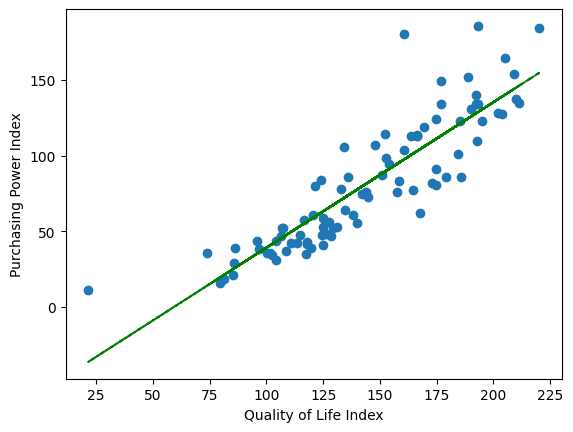

In [61]:
#Definindo eixos
x = df['Quality of Life Index'] #Eixo x
y = df['Purchasing Power Index'] #Eixo y

#Plotando gráfico 
plt.scatter(x,y)
plt.xlabel('Quality of Life Index') #Define título eixo y
plt.ylabel('Purchasing Power Index') #Define título eixo x
z = np.polyfit(df['Quality of Life Index'], df['Purchasing Power Index'], 1) #Ajusta o grau de inclinição baseado nos dados informados
n = np.poly1d(z) #Cria um objeto para que possamos aplicar no eixo x como uma função
plt.plot(x, n(x), "g--") #Plota o gráfico adicionando a linha de tendência. O terceiro parâmetro nesse caso serviu para definir a cor da reta
plt.show()

### **h)** Explore a correlação entre "Health Care Index" e "Cost of Living Index" utilizando métodos estatísticos e visuais, e explique as técnicas estatísticas utilizadas

#### Cálculo do R^2
Podemos de certa forma extrair de parte do que fizemos para o gráfico de dispersão o R^2, que é uma métrica que nos ajuda a dizer o quão que a linearidade da tendência é confiável. Quanto mais próximo de 1, mais confiança podemos ter de que existe correlação entre os dados

In [71]:
t = np.polyval(z,x) #Previsão do modelo de regressão baseado em x
residuos = (y-t)
soma_residuos = np.sum(residuos**2) #Erro do modelo
soma_totais = np.sum((y-np.mean(y))**2) #Variância do modelo
r2 = 1 - (soma_residuos / soma_totais) #Calcular a proporção da variância explicada pelo modelo
print(r2) #Excelente resultado para o R^2, dando maiores indícios da correlação

0.779316816784966


Aqui basicamente estamos aplicando x ao modelo de regressão que mede a linearidade e depois calculamos o quão esse modelo errou (baseado na diferença entre y e a previsão ao quadrado) e depois o quão cada valor variou em relação a média (cálculo de variância comum aplicado aos dados). 

Depois, ao fazermos o erro do modelo dividido pela variação, estamos calculando a proporção da variância não explicada pelo modelo. Tirando esse resultado de 1, estamos verificando <b>o quão a variação dos dados está sendo explicada pelo modelo... Em outras palavras: O quão uma variável contribui para a variação de outra</b>

#### Gráfico de Resíduos (Residual Plot)
Podemos também usar o que foi feito para o cálculo do R^2, pra entender de forma visual o quão bem os dados se correlacionam. 

Pegando os resíduos extraídos e comparando com a varíavel independente (Quality of Life Index), vimos que os pontos se dispersam bastante de maneira aleatória. 

Isso significa que os resíduos gerados (erros da regressão) não são significativos.

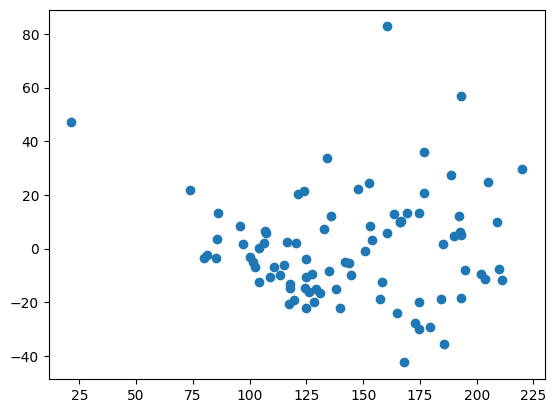

In [72]:
plt.scatter(x,residuos)

## **Questão 2**

Com o intuito de apresentar suas descobertas para os habitantes de Zootopia, Judy precisa descobrir a melhor forma de expor os dados. Ela pensou em mostrá-los em um mapa interativo, entretanto não sabe fazer isso e precisa da sua ajuda para criar esse mapa.

### **a)** Utilizando Geopandas, busque métodos para produzir um mapa com todos os indices de qualidade de vida disponíveis no dataframe trabalhado.

Dica: Utilize gradientes de cores e busque por arquivos .shp para criar seu mapa, caso não conheça, pesquise sobre.